In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_excel(r'datasetclusteringpakeini.xlsx')
df

,diagnosa,institusi,area,tipe,biaya_berobat,cluster
0,mata,rumah sakit,sukabumi,spesialis mata,200001 s.d 500000,layanan dasar ekonomis
1,mata,rumah sakit,sukabumi,spesialis mata,1000001 s.d 3000000,layanan dasar ekonomis
2,dm,laboratorium,cimahi,dokter umum,200001 s.d 500000,layanan dasar ekonomis
3,jantung,laboratorium,garut,spesialis lain-lain,500001 s.d 1000000,layanan dasar ekonomis
4,jantung,laboratorium,garut,spesialis lain-lain,500001 s.d 1000000,layanan dasar ekonomis
...,...,...,...,...,...,...
925,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah
926,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah
927,asam urat,rumah sakit,garut,dokter umum,500001 s.d 1000000,layanan spesialis menengah
928,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   diagnosa       930 non-null    object
 1   institusi      930 non-null    object
 2   area           930 non-null    object
 3   tipe           930 non-null    object
 4   biaya_berobat  930 non-null    object
 5   cluster        930 non-null    object
dtypes: object(6)
memory usage: 43.7+ KB


In [ ]:
df.nunique()

diagnosa         45
institusi         4
area             21
tipe             21
biaya_berobat     7
cluster           3
dtype: int64

In [ ]:
df.describe()

,diagnosa,institusi,area,tipe,biaya_berobat,cluster
count,930,930,930,930,930,930
unique,45,4,21,21,7,3
top,gigi,rumah sakit,garut,dokter umum,200001 s.d 500000,layanan dasar ekonomis
freq,160,404,543,468,277,310


In [ ]:
df.isnull().sum()

diagnosa         0
institusi        0
area             0
tipe             0
biaya_berobat    0
cluster          0
dtype: int64

##**MENGAMATI DATA OUTLIER**

<Axes: xlabel='diagnosa'>

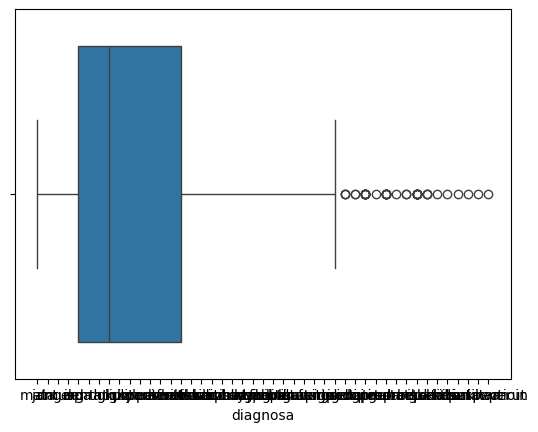

In [ ]:
sns.boxplot(x=df['diagnosa'])

<Axes: xlabel='area'>

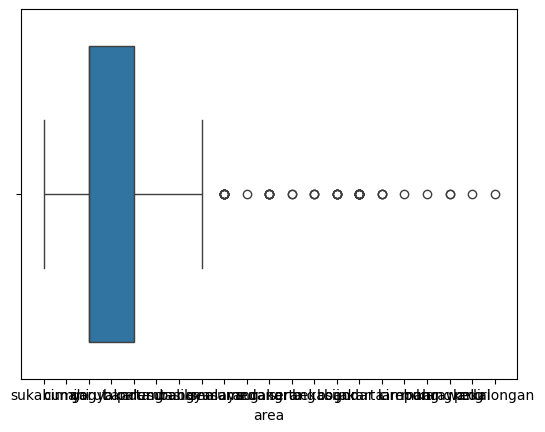

In [ ]:
sns.boxplot(x=df['area'])

<Axes: xlabel='tipe'>

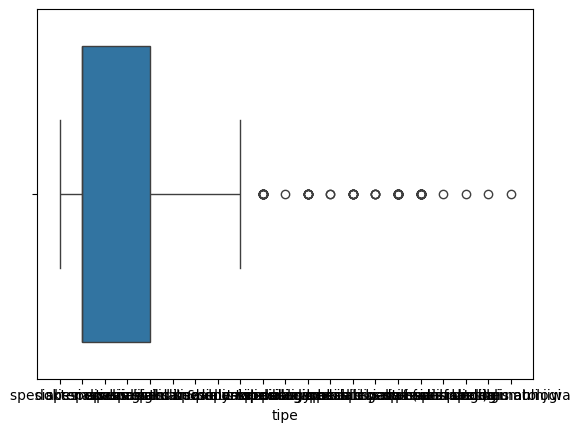

In [ ]:
sns.boxplot(x=df['tipe'])

<Axes: xlabel='biaya_berobat'>

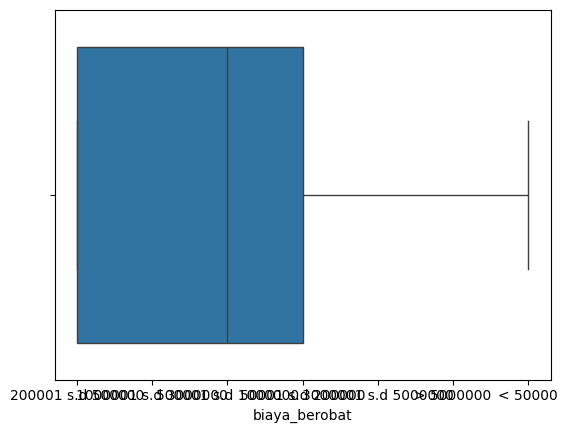

In [ ]:
sns.boxplot(x=df['biaya_berobat'])

# **PERLU DICEK DATA OUTLIER, DAN DIHAPUS**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset Anda adalah df dan kolom 'diagnosa' adalah kategorik
df2 = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
diagnosa_le = LabelEncoder()
institusi_le = LabelEncoder()
area_le = LabelEncoder()
tipe_le = LabelEncoder()
biaya_le = LabelEncoder()
cluster_le = LabelEncoder()
df['diagnosa_encod'] = diagnosa_le.fit_transform(df['diagnosa'])
df['institusi_encod'] = institusi_le.fit_transform(df['institusi'])
df['area_encod'] = area_le.fit_transform(df['area'])
df['tipe_encod'] = tipe_le.fit_transform(df['tipe'])
df['biaya_berobat_encod'] = biaya_le.fit_transform(df['biaya_berobat'])
df['cluster_encod'] = cluster_le.fit_transform(df['cluster'])

In [ ]:
df

,diagnosa,institusi,area,tipe,biaya_berobat,cluster,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod,cluster_encod
0,mata,rumah sakit,sukabumi,spesialis mata,200001 s.d 500000,layanan dasar ekonomis,28,3,15,13,1,0
1,mata,rumah sakit,sukabumi,spesialis mata,1000001 s.d 3000000,layanan dasar ekonomis,28,3,15,13,0,0
2,dm,laboratorium,cimahi,dokter umum,200001 s.d 500000,layanan dasar ekonomis,10,1,4,0,1,0
3,jantung,laboratorium,garut,spesialis lain-lain,500001 s.d 1000000,layanan dasar ekonomis,20,1,6,12,3,0
4,jantung,laboratorium,garut,spesialis lain-lain,500001 s.d 1000000,layanan dasar ekonomis,20,1,6,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
925,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah,2,2,6,0,4,2
926,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah,2,2,6,0,4,2
927,asam urat,rumah sakit,garut,dokter umum,500001 s.d 1000000,layanan spesialis menengah,2,3,6,0,3,2
928,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah,2,2,6,0,4,2


In [ ]:
# prompt: hapus kolom pertama sampai kolom ke enam

df.drop(df.columns[[0,1,2,3,4,5]], axis=1, inplace=True)


In [ ]:
df

,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod,cluster_encod
0,28,3,15,13,1,0
1,28,3,15,13,0,0
2,10,1,4,0,1,0
3,20,1,6,12,3,0
4,20,1,6,12,3,0
...,...,...,...,...,...,...
925,2,2,6,0,4,2
926,2,2,6,0,4,2
927,2,3,6,0,3,2
928,2,2,6,0,4,2


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

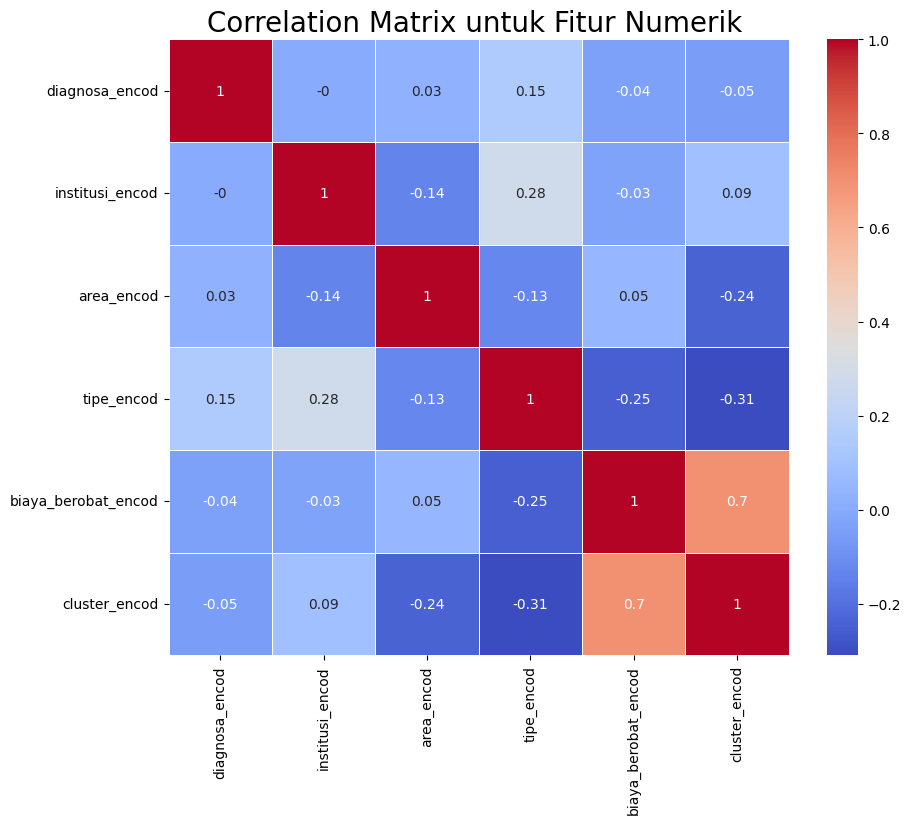

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df[['diagnosa_encod', 'institusi_encod', 'area_encod', 'tipe_encod', 'biaya_berobat_encod']]
y = df['cluster_encod']

In [ ]:
X

,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod
0,28,3,15,13,1
1,28,3,15,13,0
2,10,1,4,0,1
3,20,1,6,12,3
4,20,1,6,12,3
...,...,...,...,...,...
925,2,2,6,0,4
926,2,2,6,0,4
927,2,3,6,0,3
928,2,2,6,0,4


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
925    2
926    2
927    2
928    2
929    2
Name: cluster_encod, Length: 930, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 930
Total # of sample in train dataset: 744
Total # of sample in test dataset: 186


# **Perlu StandardScaler kah?**

#**Model Development**

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'GNaiveBayes'])

##**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##**Random Forest**

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##**Gaussian Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
models.loc['train_mse','GNaiveBayes'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

#**Evaluasi Model**

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting','GNaiveBayes'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'GNaiveBayes': nb_model}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000125,0.000187
RF,0.000002,0.000019
Boosting,0.00006,0.000087
GNaiveBayes,0.000071,0.000156


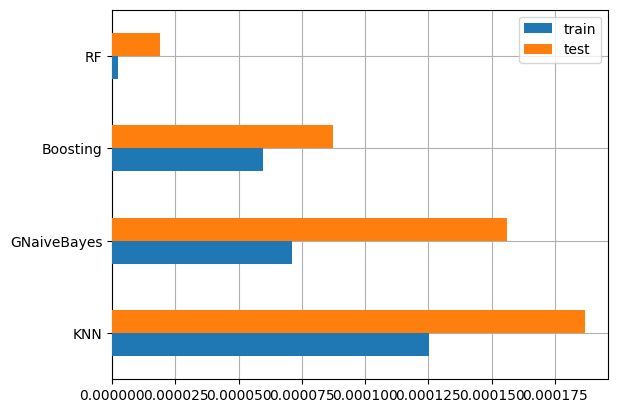

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

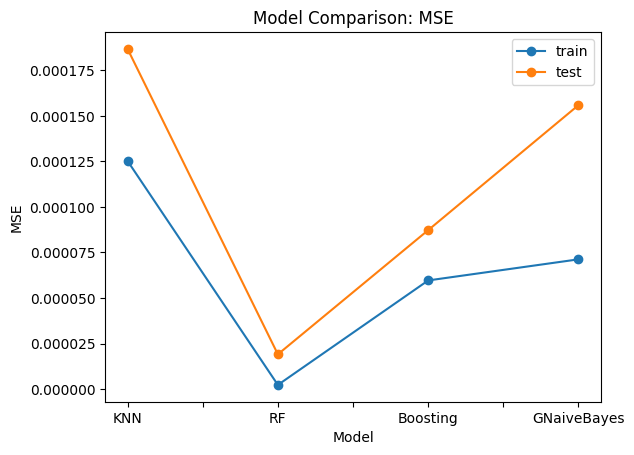

In [ ]:
# prompt: analisa code saya, yang bagian evaluasi hasil dengan MSE, buat versi line plotnya

import matplotlib.pyplot as plt

# Create a line plot of the MSE values for each model
fig, ax = plt.subplots()
mse.plot(kind='line', ax=ax, marker='o')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
ax.set_title('Model Comparison: MSE')

# Show the plot
plt.show()


In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_GNaiveBayes
689,2,2.0,2.0,2.0,2
833,2,2.0,2.0,2.0,2
249,0,0.0,0.0,0.6,0
7,0,0.0,0.0,0.5,0
586,1,1.0,1.0,0.9,1
864,2,2.0,2.0,2.0,2
917,2,2.0,2.0,2.0,2
914,2,2.0,2.0,2.0,2
85,0,0.2,0.0,0.0,0
172,0,0.9,0.0,0.8,0


Hasil diatas, y_pred = data asli, kolom setelahnya adalah prediksi2nya menggunakan algoritma yang berbeda - beda